In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("canada_per_capita_income.csv")
print(df.head())
df.head()

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


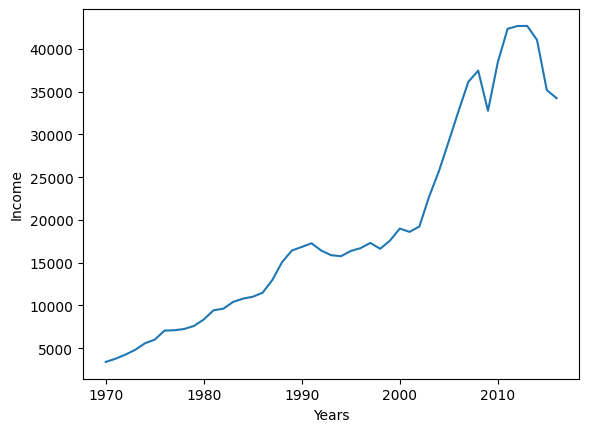

In [5]:
%matplotlib inline

plt.xlabel('Years')
plt.ylabel('Income')
plt.plot(df.year , df[["per capita income (US$)"]])
plt.show()

In [6]:
x = df[['year']]
y = df[['per capita income (US$)']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

print(x_train,1)
print(x_test, 2)
print(y_train, 3)
print(y_test, 4)

    year
45  2015
2   1972
37  2007
32  2002
10  1980
21  1991
34  2004
27  1997
18  1988
31  2001
1   1971
12  1982
33  2003
42  2012
26  1996
5   1975
13  1983
22  1992
19  1989
17  1987
14  1984
4   1974
38  2008
24  1994
11  1981
16  1986
43  2013
46  2016
8   1978
40  2010
29  1999
25  1995
28  1998
0   1970
15  1985
36  2006
9   1979 1
    year
35  2005
23  1993
41  2011
39  2009
44  2014
20  1990
3   1973
30  2000
7   1977
6   1976 2
    per capita income (US$)
45             35175.188980
2               4251.175484
37             36144.481220
32             19232.175560
10              8355.968120
21             17266.097690
34             25719.147150
27             17310.757750
18             15080.283450
31             18601.397240
1               3768.297935
12              9619.438377
33             22739.426280
42             42665.255970
26             16699.826680
5               5998.144346
13             10416.536590
22             16412.083090
19             16426.72

In [7]:
reg = linear_model.LinearRegression()
#reg.fit(df[["year"]] , df[["per capita income (US$)"]])
reg.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
reg.predict(x_test)

reg.score(x_test, y_test)


0.9063173168991836

[[1970.        ]
 [1975.11111111]
 [1980.22222222]
 [1985.33333333]
 [1990.44444444]
 [1995.55555556]
 [2000.66666667]
 [2005.77777778]
 [2010.88888889]
 [2016.        ]]


/opt/anaconda3/envs/ML_Test/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


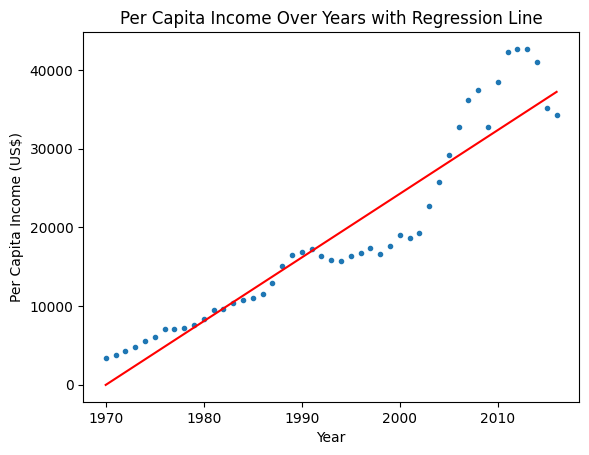

In [9]:
%matplotlib inline

plt.scatter(df['year'], df['per capita income (US$)'], marker='.')

years = np.linspace(df['year'].min(), df['year'].max(), 10)

# To change 1D array to 2D array by using reshape(-1,1)
income_pred = reg.predict(years.reshape(-1, 1))

print(years.reshape(-1,1))

plt.plot(years, income_pred, color='red')

plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Per Capita Income Over Years with Regression Line')
plt.show()

In [10]:
# y = mx + b
print(reg.intercept_) # b
print(reg.coef_) # m

[-1595560.1423449]
[[809.90973656]]


In [11]:
import pickle

#save model
with open('model_savefile' , 'wb') as f:
    pickle.dump(reg, f)

In [12]:
with open('model_savefile' , 'rb') as f:
    model = pickle.load(f)

model.predict([[2000]])
    

/opt/anaconda3/envs/ML_Test/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[24259.33077126]])